In [1]:
### Data integration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Input Data dari EXCEL berdasarkan SHEET
data = pd.read_excel('datalatihan.xlsx',sheet_name='NRP_0dan2')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,type
0,39,Stategov,77516,Bachelors,13,Nevermarried,Admclerical,Notinfamily,White,Male,2174,0,40,UnitedStates,<=50K
1,50,Selfempnotinc,83311,Bachelors,13,Marriedcivspouse,Execmanagerial,Husband,White,Male,0,0,13,UnitedStates,<=50K
2,38,Private,215646,HSgrad,9,Divorced,Handlerscleaners,Notinfamily,White,Male,0,0,40,UnitedStates,<=50K
3,53,Private,234721,11th,7,Marriedcivspouse,Handlerscleaners,Husband,Black,Male,0,0,40,UnitedStates,<=50K
4,28,Private,338409,Bachelors,13,Marriedcivspouse,Profspecialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age              300 non-null int64
workclass        300 non-null object
fnlwgt           300 non-null int64
education        300 non-null object
educationnum     300 non-null int64
maritalstatus    300 non-null object
occupation       300 non-null object
relationship     300 non-null object
race             300 non-null object
sex              300 non-null object
capitalgain      300 non-null int64
capitalloss      300 non-null int64
hoursperweek     300 non-null int64
nativecountry    300 non-null object
type             300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [5]:
data = data.replace(' ?', np.nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age              300 non-null int64
workclass        284 non-null object
fnlwgt           300 non-null int64
education        300 non-null object
educationnum     300 non-null int64
maritalstatus    300 non-null object
occupation       284 non-null object
relationship     300 non-null object
race             300 non-null object
sex              300 non-null object
capitalgain      300 non-null int64
capitalloss      300 non-null int64
hoursperweek     300 non-null int64
nativecountry    293 non-null object
type             300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [7]:
Y = ['type']
X_int = ['capitalgain', 'capitalloss', 'hoursperweek','educationnum','fnlwgt','age']
X_cat = ['workclass', 'education','maritalstatus',
        'occupation','relationship','race','sex','nativecountry']

In [8]:
data_Y = data[Y]
data_int = data[X_int].astype(int)
data_cat = data[X_cat]

In [9]:
#show all distinct value of class
print(data_Y['type'].unique())

[' <=50K' ' >50K']


In [10]:
## find missing data for each data type and fill it with mean and mode
data_int_array = []
data_cat_array = []
for type_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==type_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==type_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [11]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [21]:
databaru = pd.concat([data_int_clean,data_Y], axis=1)

In [22]:
databaru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
capitalgain     300 non-null int32
capitalloss     300 non-null int32
hoursperweek    300 non-null int32
educationnum    300 non-null int32
fnlwgt          300 non-null int32
age             300 non-null int32
type            300 non-null object
dtypes: int32(6), object(1)
memory usage: 11.7+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
data_cat_clean['workclass'] = LabelEncoder().fit_transform(data_cat_clean['workclass'])
data_cat_clean['education'] = LabelEncoder().fit_transform(data_cat_clean['education'])
data_cat_clean['maritalstatus'] = LabelEncoder().fit_transform(data_cat_clean['maritalstatus'])
data_cat_clean['occupation'] = LabelEncoder().fit_transform(data_cat_clean['occupation'])
data_cat_clean['relationship'] = LabelEncoder().fit_transform(data_cat_clean['relationship'])
data_cat_clean['race'] = LabelEncoder().fit_transform(data_cat_clean['race'])
data_cat_clean['sex'] = LabelEncoder().fit_transform(data_cat_clean['sex'])
data_cat_clean['nativecountry'] = LabelEncoder().fit_transform(data_cat_clean['nativecountry'])

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
databaru['capitalgain'] = StandardScaler().fit(databaru[['capitalgain']]).transform(databaru[['capitalgain']])
databaru['capitalloss'] = StandardScaler().fit(databaru[['capitalloss']]).transform(databaru[['capitalloss']])
databaru['hoursperweek'] = StandardScaler().fit(databaru[['hoursperweek']]).transform(databaru[['hoursperweek']])
databaru['educationnum'] = StandardScaler().fit(databaru[['educationnum']]).transform(databaru[['educationnum']])
databaru['fnlwgt'] = StandardScaler().fit(databaru[['fnlwgt']]).transform(databaru[['fnlwgt']])
databaru['age'] = StandardScaler().fit(databaru[['age']]).transform(databaru[['age']])

In [27]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

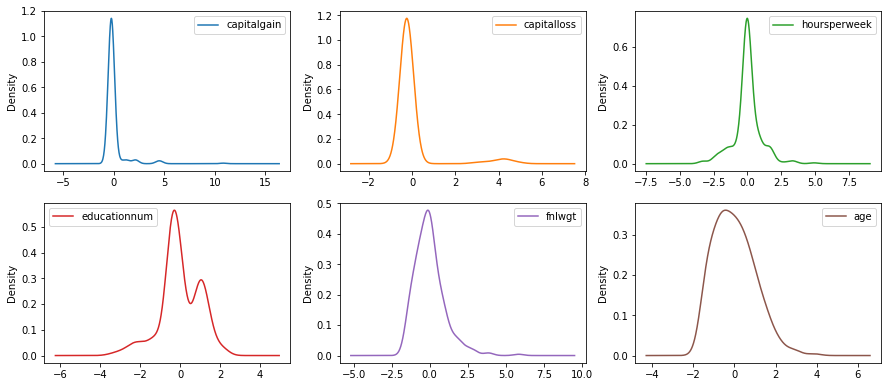

In [28]:
# Univariate Density Plots
databaru.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

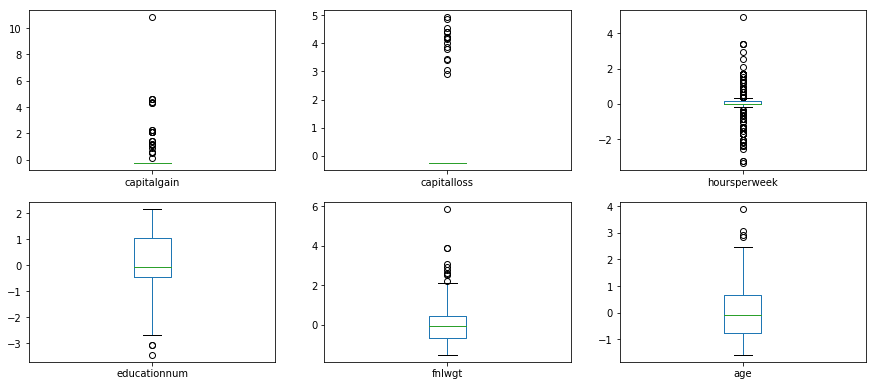

In [29]:
databaru.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [33]:
colors_palette = {" <=50K": "red",  " >50K": "blue"}
colors = [colors_palette[c] for c in databaru['type']]   

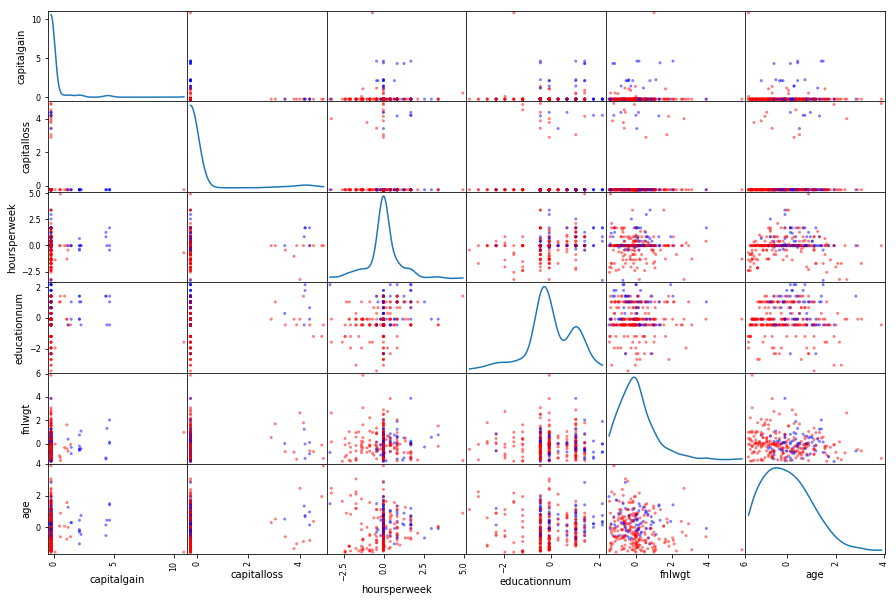

In [34]:
## red : <=50K
## blue: >50K
from pandas.plotting import scatter_matrix
scatter_matrix(databaru, color=colors, diagonal='kde')
plt.show()

In [35]:
cleaned=pd.concat([databaru, data_cat_clean], axis=1)

In [37]:
cleaned.to_csv('cleaned.csv', index=0)